Accuracy on the test set: 78.57%


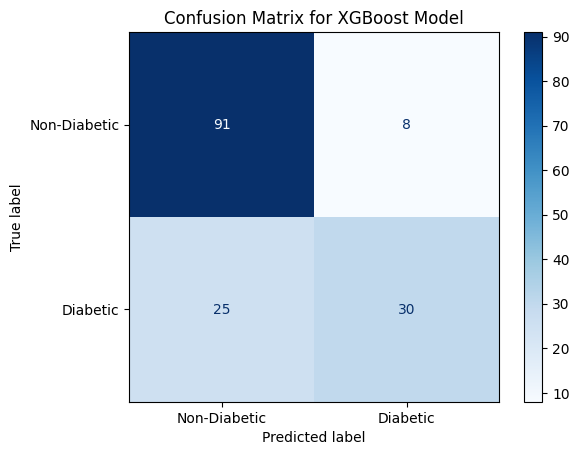

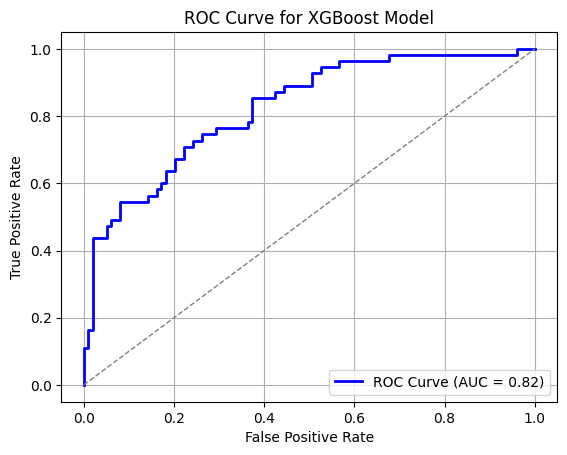

In [82]:
#https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from xgboost import XGBRFClassifier

np.random.seed(2024)
diabetes = pd.read_csv('diabetes_preprocessed.csv')

y = diabetes.get('Outcome').values
X = diabetes.drop(axis='columns', columns ='Outcome').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

#parameters:
learning_rate = 1 #1 is the best learning rate
num_trees = 21 #21 is best
max_depth = None # 

#creating the model
model = XGBRFClassifier(learning_rate=learning_rate, n_estimators=num_trees, max_depth=max_depth, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

#compute accuracy
test_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# ROC AUC Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


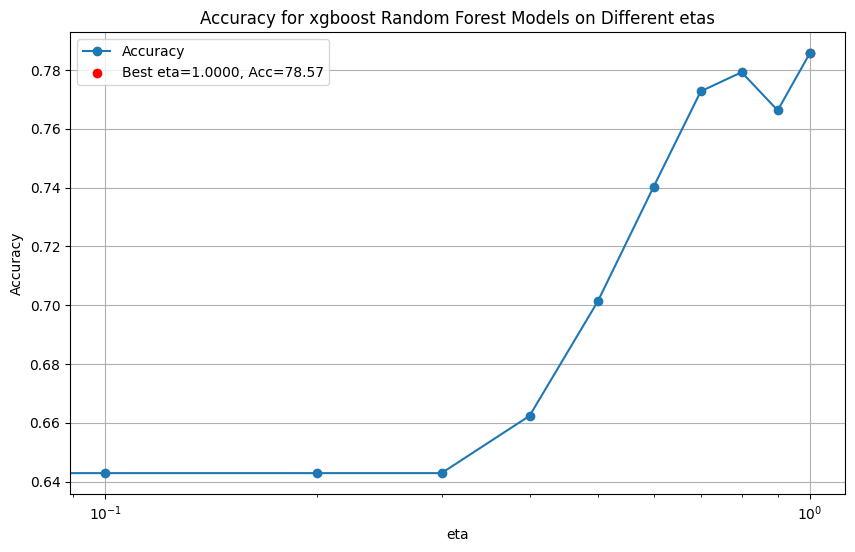

In [ ]:
# testing different learning rates
learning_rates = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results = []
best_accuracy = 0

for lr in range(0,11):

    model = XGBRFClassifier(learning_rate=lr/10,n_estimators=21, subsample=0.9, colsample_bynode=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = lr/10

best_accuracy_percentage = best_accuracy*100

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, results, marker='o', label='Accuracy')
plt.xlabel('eta values')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Accuracy for xgboost Random Forest Models on Different eta values')

# Mark the best accuracy point on the plot
plt.scatter([best_learning_rate], [best_accuracy], color='red', label=f'Best eta={best_learning_rate:.4f}, Acc={best_accuracy_percentage:.2f}')
plt.legend()
plt.grid()
plt.show()

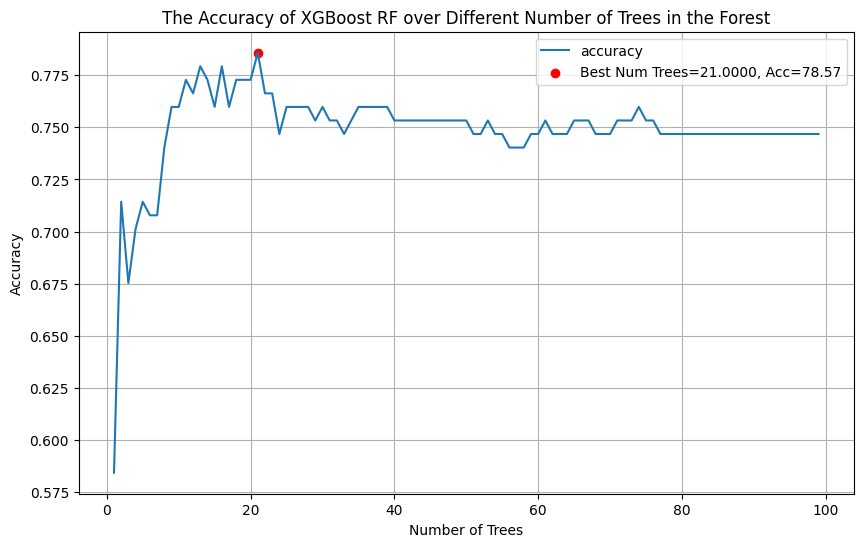

In [70]:
# testing different number of trees in the forest
n_estimators = list(range(1,100,1))
results = []
best_accuracy = 0

for estimator in range(1,100,1):
    model = XGBRFClassifier(learning_rate=1, n_estimators=estimator, subsample=0.9, colsample_bynode=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num = estimator 

best_accuracy_percentage = best_accuracy*100

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, results, label='accuracy')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("The Accuracy of XGBoost RF over Different Number of Trees in the Forest")
plt.scatter([best_num], [best_accuracy], color='red', label=f'Best Num Trees={best_num:.4f}, Acc={best_accuracy_percentage:.2f}')
plt.legend()
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

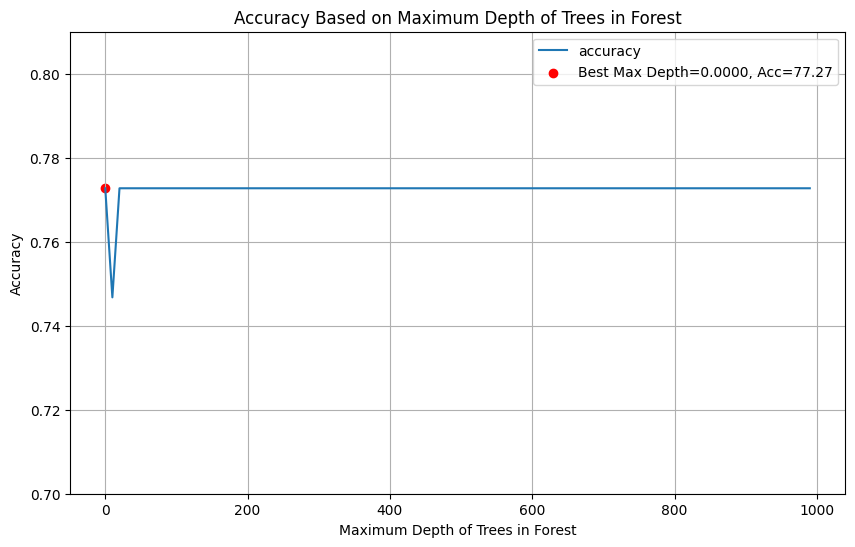

In [81]:
# testing different number of trees in the forest
# testing different maximum depths
max_depths = list(range(0,1000,10))
results = []
best_accuracy = 0

#for depth in max_depths:
for depth in range (0,1000,10):
    random_forest = XGBRFClassifier(
    learning_rate=2,
    n_estimators=31, 
    subsample=0.9, 
    colsample_bynode=0.2,
    max_depth=depth)

    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num = depth 

acc_percent = best_accuracy*100
plt.figure(figsize=(10, 6))
plt.plot(max_depths, results, label='accuracy')
plt.xlabel('Maximum Depth of Trees in Forest')
plt.ylabel('Accuracy')
plt.ylim(0.70,0.81)
plt.title("Accuracy Based on Maximum Depth of Trees in Forest")
plt.scatter([best_num], [best_accuracy], color='red', label=f'Best Max Depth={best_num:.4f}, Acc={acc_percent:.2f}')
plt.legend()
plt.grid()
plt.show